# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [38]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, date

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
marstemp_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = marstemp_soup.find_all('tr')



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_facts = []


# Loop through the rows
for row in rows:
    # Find all the cells in the row
    cells = row.find_all('td')
    # Extract the text from the cells
    row_data = [cell.text for cell in cells]
    # Append the data to the list
    mars_facts.append(row_data)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create the DataFrame
df = pd.DataFrame(mars_facts, columns=column_names)

df_new = df.drop(df.index[0])



In [8]:
# Confirm DataFrame was created successfully
# Print the DataFrame
print(df_new)

        id terrestrial_date   sol   ls month min_temp pressure
1        2       2012-08-16    10  155     6    -75.0    739.0
2       13       2012-08-17    11  156     6    -76.0    740.0
3       24       2012-08-18    12  156     6    -76.0    741.0
4       35       2012-08-19    13  157     6    -74.0    732.0
5       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1863  1889       2018-02-23  1973  133     5    -78.0    730.0
1864  1892       2018-02-24  1974  134     5    -77.0    729.0
1865  1894       2018-02-25  1975  134     5    -76.0    729.0
1866  1893       2018-02-26  1976  135     5    -77.0    728.0
1867  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [46]:
# Examine data type of each column
print(df_new.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [74]:
# Change data types for data analysis
df_new["id"] = df_new["id"].astype(int)
df_new["sol"] = df_new["sol"].astype(int)
df_new["ls"] = df_new["ls"].astype(int)
df_new["min_temp"] = df_new["min_temp"].astype(float)
df_new["month"] = df_new["month"].astype(int)
df_new["pressure"] = df_new["pressure"].astype(float)
df_new["terrestrial_date"] = pd.to_datetime(df_new["terrestrial_date"])



In [75]:
# Confirm type changes were successful by examining data types again

print(df_new.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [77]:
# 1. How many months are there on Mars?
months_on_mars = df_new["month"].nunique()
months_on_mars

12

In [50]:
# 2. How many Martian days' worth of data are there?
print(f"Total Martian days worth of data: {df_new['sol'].max()}.")

Total Martian days worth of data: 1977.


In [82]:
# 3. What is the average low temperature by month?
avg_temp_by_month = df_new.groupby(["month"]).mean()["min_temp"]
avg_temp_by_month

month
1    -76.988506
2    -76.909091
3    -77.349206
4    -76.098592
5    -75.573427
6    -75.671233
7    -76.177305
8    -75.851613
9    -75.816092
10   -75.685083
11   -75.537975
12   -75.994220
Name: min_temp, dtype: float64

<AxesSubplot:title={'center':'Average Temperature by Month'}, xlabel='Month', ylabel='Average Min-Temperature'>

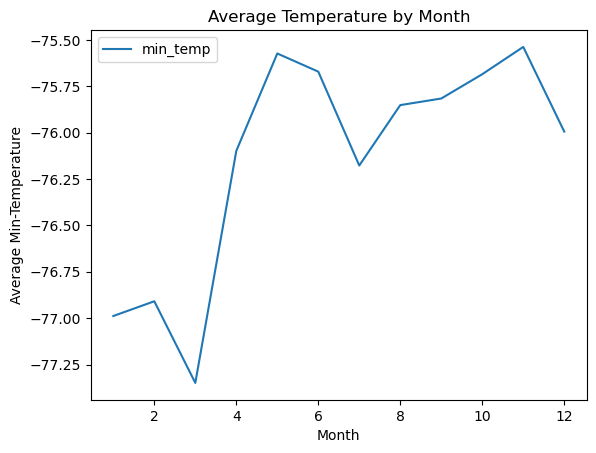

In [84]:
# Plot the average temperature by month
avg_mars_temp.plot.line(x='month', y='min_temp', 
                        xlabel='Month', 
                        ylabel='Average Min-Temperature', 
                        title='Average Temperature by Month')



In [42]:
# Identify the coldest and hottest months in Curiosity's location
#The 3rd month is the coldest, while the 8th month is the warmest

In [31]:
# 4. Average pressure by Martian month

avg_mars_pressure = df_new.groupby(['month']).mean().reset_index()
avg_mars_pressure

,month,id,sol,ls,min_temp,pressure
0,1,978.057471,1053.321839,180.695402,-76.988506,861.258621
1,2,1023.292208,1096.675325,194.012987,-76.909091,837.967532
2,3,970.261905,1040.706349,222.436508,-77.349206,827.722222
3,4,881.028169,957.021127,244.211268,-76.098592,817.676056
4,5,942.118881,1009.398601,197.006993,-75.573427,803.601399
5,6,954.636986,1016.328767,176.938356,-75.671233,807.910959
6,7,961.361702,1023.957447,147.127660,-76.177305,822.510638
7,8,965.864516,1021.980645,103.993548,-75.851613,829.606452
8,9,902.436782,934.419540,118.379310,-75.816092,845.586207
9,10,926.132597,956.933702,135.480663,-75.685083,865.475138


<AxesSubplot:title={'center':'Monthly Average Pressure in Mars'}, xlabel='Month', ylabel='Average Pressure'>

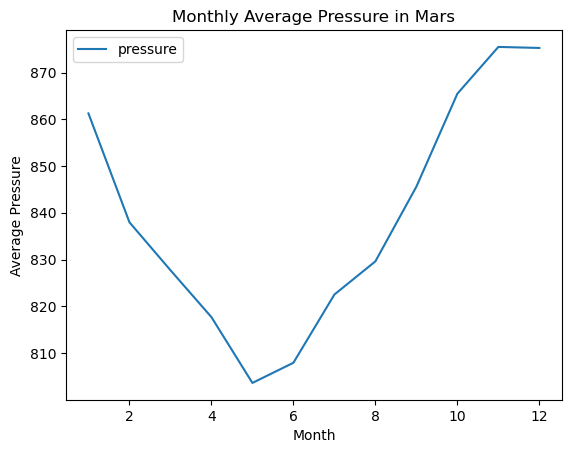

In [33]:
# Plot the average pressure by month
avg_mars_pressure.plot.line(x='month', 
                            y='pressure', 
                            xlabel='Month',
                            ylabel='Average Pressure', 
                            title='Monthly Average Pressure in Mars')


In [70]:
# 5. How many terrestrial (earth) days are there in a Martian year?
d1 = df_new.loc[df_new['month'] == 1 , 'terrestrial_date'].head(1).to_string(index=False)
date1 = datetime.strptime(d1, '%Y-%m-%d')

d2 = df_new.loc[(df_new['month'] == 12) & 
                 (df_new['terrestrial_date'] < '2015-05-12'), 'terrestrial_date'].tail(1).to_string(index=False)
date2 = datetime.strptime(d2, '%Y-%m-%d')

delta = date2 - date1
print(f"A martian year is about {delta.days} earth days.")


A martian year is about 729 earth days.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df_new.to_csv('mars_table.csv',index=False)

In [22]:
browser.quit()